In [3]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

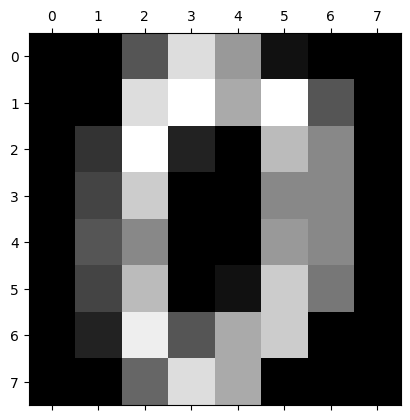

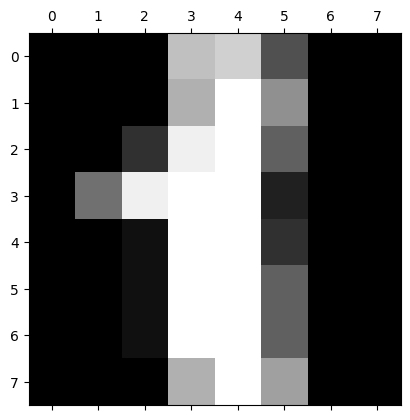

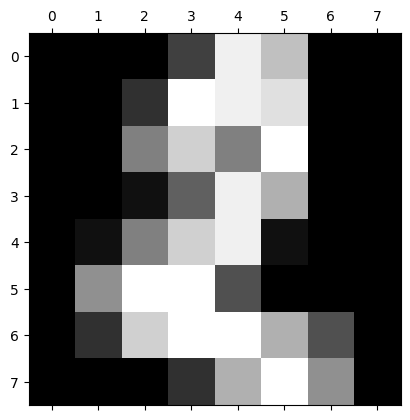

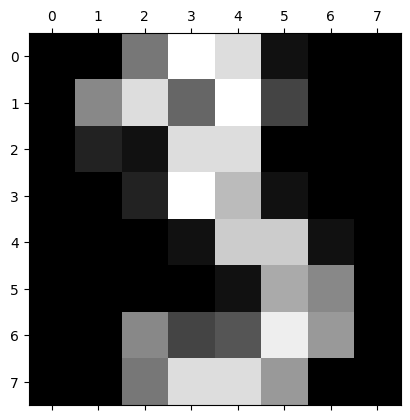

In [6]:
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [7]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df['target']=digits.target
df.head(65)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,0.0,10.0,15.0,14.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,12.0,15.0,11.0,2.0,0.0,3
61,0.0,0.0,6.0,13.0,16.0,6.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,4.0,16.0,7.0,0.0,0.0,0.0,7
62,0.0,0.0,14.0,16.0,14.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,16.0,16.0,10.0,1.0,0.0,3
63,0.0,3.0,16.0,16.0,14.0,7.0,1.0,0.0,0.0,1.0,...,0.0,0.0,2.0,13.0,16.0,12.0,5.0,0.0,0.0,3


In [12]:
X=df.drop(['target'],axis='columns')
y=df.target

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
scores = []
timestraps = []

for i in range(1, 40):
    model = RandomForestClassifier(
        bootstrap=True, class_weight=None, criterion='gini',
        max_depth=None, max_features='sqrt', max_leaf_nodes=None,
        min_impurity_decrease=2e-7, min_samples_leaf=1,
        min_samples_split=2, min_weight_fraction_leaf=0.0,
        n_estimators=i,
        n_jobs=None, oob_score=False, random_state=None,
        verbose=0, warm_start=False
    )

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(model.score(x_test, y_test))
    timestraps.append(i)


In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Truth')

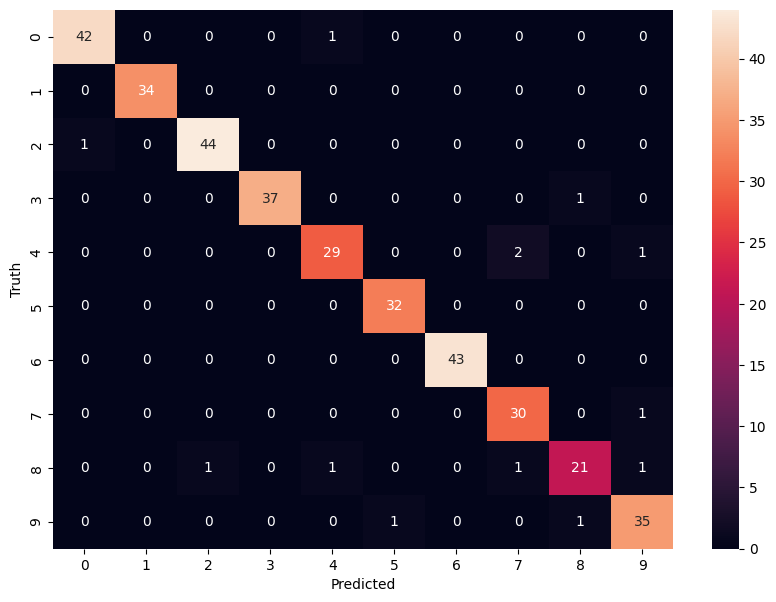

In [53]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

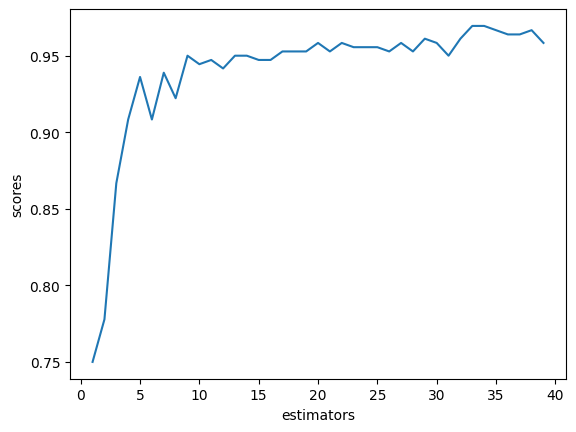

In [69]:
plt.plot(timestraps,scores)
plt.xlabel('estimators')
plt.ylabel('scores')
plt.show()